In [75]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [114]:
data = pd.read_parquet("/Users/arvinprince/pytorch-files/Google ASL/data/450474571.parquet")
data = pd.read_parquet("/Users/arvinprince/pytorch-files/Google ASL/data/296317215.parquet")

In [115]:
data.head()

,frame,x_face_0,x_face_1,x_face_2,x_face_3,x_face_4,x_face_5,x_face_6,x_face_7,x_face_8,...,z_right_hand_11,z_right_hand_12,z_right_hand_13,z_right_hand_14,z_right_hand_15,z_right_hand_16,z_right_hand_17,z_right_hand_18,z_right_hand_19,z_right_hand_20
sequence_id,,,,,,,,,,,,,,,,,,,,,
1494438637,0,0.558159,0.550603,0.554162,0.543828,0.551478,0.555103,0.566358,0.455327,0.572389,...,-0.124966,-0.113680,-0.103391,-0.118710,-0.091068,-0.071286,-0.095167,-0.091655,-0.064835,-0.046677
1494438637,1,0.559157,0.550627,0.554241,0.543452,0.551426,0.554883,0.565622,0.455519,0.571343,...,-0.101074,-0.092762,-0.083472,-0.102874,-0.077500,-0.058431,-0.076877,-0.079398,-0.056055,-0.039821
1494438637,2,0.555381,0.551183,0.554637,0.543676,0.551955,0.555277,0.565502,0.454227,0.570983,...,-0.139371,-0.124513,-0.095812,-0.131984,-0.104427,-0.075522,-0.096968,-0.116063,-0.090169,-0.064778
1494438637,3,0.557249,0.550174,0.553681,0.542862,0.550985,0.554343,0.564671,0.454935,0.570286,...,-0.187725,-0.179453,-0.133177,-0.173193,-0.143141,-0.115510,-0.135543,-0.150484,-0.123912,-0.102089
1494438637,4,0.557520,0.551252,0.554584,0.543844,0.552108,0.555526,0.566051,0.454531,0.571771,...,-0.167483,-0.152804,-0.127324,-0.171816,-0.133314,-0.097499,-0.145111,-0.160346,-0.122395,-0.090545


In [116]:
columns = data.columns

In [117]:
xy_cols = [z for z in columns if z[0] != "z"]

In [118]:
rel_data = data.loc[:, xy_cols]

In [119]:
rel_data.head()

,frame,x_face_0,x_face_1,x_face_2,x_face_3,x_face_4,x_face_5,x_face_6,x_face_7,x_face_8,...,y_right_hand_11,y_right_hand_12,y_right_hand_13,y_right_hand_14,y_right_hand_15,y_right_hand_16,y_right_hand_17,y_right_hand_18,y_right_hand_19,y_right_hand_20
sequence_id,,,,,,,,,,,,,,,,,,,,,
1494438637,0,0.558159,0.550603,0.554162,0.543828,0.551478,0.555103,0.566358,0.455327,0.572389,...,0.744731,0.745125,0.795503,0.786876,0.782534,0.784127,0.831919,0.819879,0.816432,0.819565
1494438637,1,0.559157,0.550627,0.554241,0.543452,0.551426,0.554883,0.565622,0.455519,0.571343,...,0.706630,0.710653,0.740496,0.734366,0.734149,0.740307,0.769386,0.756791,0.753487,0.757922
1494438637,2,0.555381,0.551183,0.554637,0.543676,0.551955,0.555277,0.565502,0.454227,0.570983,...,0.747634,0.751056,0.809846,0.794748,0.789589,0.794796,0.856244,0.834563,0.828920,0.835455
1494438637,3,0.557249,0.550174,0.553681,0.542862,0.550985,0.554343,0.564671,0.454935,0.570286,...,0.725863,0.727610,0.772962,0.763827,0.767529,0.773106,0.814278,0.802138,0.802642,0.808081
1494438637,4,0.557520,0.551252,0.554584,0.543844,0.552108,0.555526,0.566051,0.454531,0.571771,...,0.750444,0.750317,0.773551,0.785368,0.796769,0.794533,0.828534,0.832497,0.836221,0.832505


In [120]:
import plotly.express as px

In [122]:
# contour = dict(rel_data.iloc[0,:])
contour = dict(data.iloc[0,:])

x_contour = [contour[x] for x in contour.keys() if x[0] == "x"]
y_contour = [contour[y] for y in contour.keys() if y[0] == "y"]
z_contour = [contour[z] for z in contour.keys() if z[0] == "z"]

# xy_contour = tuple(zip(x_contour, y_contour))
xyz_contour = tuple(zip(x_contour, y_contour, z_contour))

plt.figure(figsize= (7,7))
# plt.scatter(x_contour, y_contour,s=4)
fig = px.scatter_3d(x= x_contour, y= y_contour, z= z_contour)
fig.update_traces(marker_size=4)
fig.show()
# plt.show()

<Figure size 700x700 with 0 Axes>

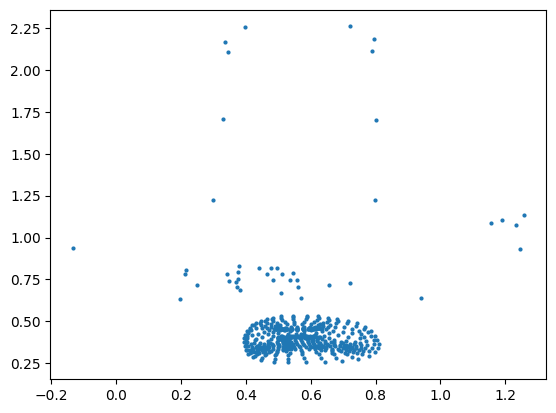

In [123]:
contour = dict(rel_data.iloc[0,:])
x_contour = [contour[x] for x in contour.keys() if x[0] == "x"]
y_contour = [contour[y] for y in contour.keys() if y[0] == "y"]
xy_contour = tuple(zip(x_contour, y_contour))

plt.scatter(x_contour, y_contour,s=4)
# fig = px.scatter_3d(x= x_contour, y= y_contour, z= z_contour)
# fig.update_traces(marker_size=4)
# fig.show()
plt.show()